<a href="https://colab.research.google.com/github/audreyakwenye/popofdata-notebooks/blob/master/RealQaiQai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basilica

  Stored in directory: /root/.cache/pip/wheels/98/53/41/06a6ea54de7f8859628e0119a765e1357c537c19d6ca37c41e
Successfully built basilica


In [0]:
import basilica
import tweepy


TWITTER_AUTH = tweepy.OAuthHandler(('LCvsZHq5crsrA7wgyIv7RgbiJ'),('WqkW7GIJQf0aItNppvwaa9tP9hzosEiT72LQQ9ai7JvxIN6Qc5'))
TWITTER_AUTH.set_access_token(('144438950-HGdLklLXDJOa1wSUK5q7y5OZm3D1SW6ZULCxXtuO'), ('MIJU1gewMU1CTRdio7y2LChJc1MrcA7NmDnJUXFKAR3o9'))
TWITTER = tweepy.API(TWITTER_AUTH)

BASILICA = basilica.Connection('2ec06df2-db38-1bf4-77c3-303b3bb27550')

# User 1 
username = "serenawilliams"
number_of_tweets=200
tweets = TWITTER.user_timeline(username, count=200, exclude_replies=True, include_rts=False, tweet_mode='extended') 
tmp=[]  
user1 = []
tweet_times = []
tweets_for_csv = [tweet.full_text for tweet in tweets] # CSV file created  
for j in tweets_for_csv: 
  tmp.append(j)  
for tweet in tweets:
  user1_embedding = BASILICA.embed_sentence(tweet.full_text, model='twitter')
  user1.append(user1_embedding) 
tweets_times = [tweet.created_at for tweet in tweets] # CSV file created  
for tt in tweets_for_csv: 
  tweet_times.append(tt) 

#user 2 
username2 = "alexisohanian"
number_of_tweets=200
tweets2 = TWITTER.user_timeline(username2, count=200, exclude_replies=True, include_rts=False, tweet_mode='extended')  
tmp2=[]  
user2 = []
tweet_times2 = []
tweets_for_csv = [tweet.full_text for tweet in tweets2] # CSV file created  
for j in tweets_for_csv: 
  tmp2.append(j)  
for tweet in tweets2:
  user2_embedding = BASILICA.embed_sentence(tweet.full_text, model='twitter')
  user2.append(user2_embedding) 
tweets_times = [tweet.created_at for tweet in tweets] # CSV file created  
for tt in tweets_for_csv: 
  tweet_times2.append(tt) 
  
#user 3 
username3 = "RealQaiQai" 
number_of_tweets=200
tweets3 = TWITTER.user_timeline(username3, count=200, exclude_replies=True, include_rts=False, tweet_mode='extended')  
tmp3=[]  
user3 = []
tweet_times3 = []
tweets_for_csv = [tweet.full_text for tweet in tweets3] # CSV file created  
for j in tweets_for_csv: 
  tmp3.append(j)  
for tweet in tweets3:
  user3_embedding = BASILICA.embed_sentence(tweet.full_text, model='twitter')
  user3.append(user3_embedding) 
tweets_times = [tweet.created_at for tweet in tweets] # CSV file created  
for tt in tweets_for_csv: 
  tweet_times3.append(tt) 

In [3]:
print(user1_embedding)

[-0.375059, -0.316693, 0.581683, -0.941376, 0.800957, 0.173794, 0.506512, -0.237113, -0.0396377, -0.00407114, -0.639926, -0.111304, -0.261752, 0.290482, -1.00797, -0.305872, 0.374825, -0.416557, 0.271504, -0.0997132, 0.383388, -0.516897, 0.0580225, -0.183415, -0.0401257, -0.759606, 0.449994, -0.577394, -0.55966, -0.0310467, 0.902866, -0.247789, -0.0288131, 0.80999, -0.247501, -0.559329, -0.22733, -0.0968651, 0.0369033, -0.183944, -0.437119, 0.244016, 0.222204, -0.726511, -0.246177, 0.0801402, -2.91123, 0.173483, -0.916558, 0.738686, -0.157333, 0.594903, 0.277338, 0.454855, 0.487249, 0.256405, -0.314081, -0.254316, -0.436334, 0.235318, 0.559296, 0.416811, 0.456997, 0.154668, 0.227699, 0.34254, 0.466037, 0.0304524, -0.791307, 0.382502, 0.20376, -0.514662, 0.284189, 0.647188, 0.0426619, -0.923187, 0.0825708, 0.295492, 0.017821, 0.23174, 0.278296, -0.591534, -0.237333, -0.520391, 0.215813, 0.213083, 0.794024, 0.721586, 0.0809789, 0.667826, -0.197417, -0.526829, 0.508292, 0.318484, 0.135476

In [0]:
import pandas as pd
serena_tweet_times = pd.DataFrame(tweet_times)
alexis_tweet_times = pd.DataFrame(tweet_times2)
realqaiqai_tweet_times = pd.DataFrame(tweet_times3)

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression

embeddings = np.vstack([user1, user2])
labels = np.concatenate([np.ones(len(user1)),
                         np.zeros(len(user2))])
log_reg = LogisticRegression().fit(embeddings, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:

preds = []
for tweets in tmp3:
  tweet_embedding = BASILICA.embed_sentence(tweets, model='twitter')
  prediction = log_reg.predict(np.array(tweet_embedding).reshape(1, -1))
  preds.append(prediction)


In [7]:
preds

[array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array

In [0]:
results = pd.DataFrame(preds)

In [0]:
results["prediction"] = results[0]

In [0]:
results["prediction"] = results["prediction"].replace(1, "Serena") 
results["prediction"] = results["prediction"].replace(0, "Alexis") 

In [11]:
results

,0,prediction
0,1.0,Serena
1,1.0,Serena
2,0.0,Alexis
3,1.0,Serena
4,0.0,Alexis
5,1.0,Serena
6,1.0,Serena
7,1.0,Serena
8,0.0,Alexis
9,0.0,Alexis


Text(0.5, 1.0, 'Author Prediction for RealQaiQai')

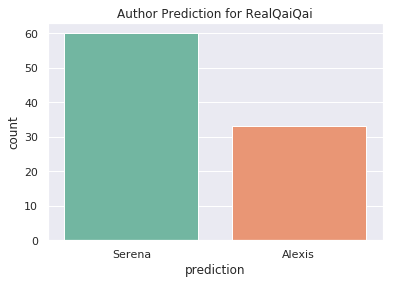

In [12]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='prediction', data=results, palette="Set2").set_title('Author Prediction for RealQaiQai')

In [0]:
results['prediction'].value_counts()



Serena    54
Alexis    41
Name: prediction, dtype: int64

In [0]:
[-0.485898, -0.21868, 0.898436, -0.885947, 0.973105, 0.115463, 0.207508, 0.313808, -0.372795, 
 -0.75773, -0.814398, 0.702742, -0.447846, -0.190936, -1.35669, -0.647261, 0.226654, 
 -1.42672, -0.132541, -0.0748852, 0.0915741, -0.0845283, -0.932917, 
 -0.162257, 0.146233, -0.710335, -0.263328, -1.11616, -0.590091, -0.412603, 
 0.0778081, -0.308075, -0.0392159, 0.8991, -0.62728, 0.0354784, 0.0445394, 
 -1.08936, 0.489493, 0.145349, -0.0688905, 0.370443, -0.117785, -1.19763, 
 0.189705, -0.114372, -2.45306, -0.510321, 0.341538, -0.127009, 0.455373, 
 -0.0198026, -0.815872, 0.0482393, 0.696047, 0.322506, -0.558229, 0.662123, 
 -1.18184, -0.204376, 0.43381, -0.111766, -0.081066, 0.231864, 0.309805, 
 0.0386353, 0.100716, -0.639384, -0.580831, 1.17656, 0.0859299, -0.396736,